In [28]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [29]:
!pip install -q kaggle

In [30]:
!pip install opendatasets

In [31]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset')

Skipping, found downloaded files in "./new-plant-diseases-dataset" (use force=True to force download)


In [32]:
# import libraries

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [33]:
# re-size all the images to this

IMAGE_SIZE = [224, 224]

train_path = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'

In [34]:
IMAGE_SIZE = [224, 224]
inception = InceptionV3(input_shape=IMAGE_SIZE+ [3], weights='imagenet', include_top=False)

In [35]:
# don't train existing weights
for layer in inception.layers:
  layer.trainable = False

In [36]:
# useful for getting number of output classes
folders = glob('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/*')

In [37]:
folders

['/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Blueberry___healthy',
 '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_',
 '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy',
 '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Peach___Bacterial_spot',
 '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Squash___Powdery_mildew',
 '/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/To

In [38]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [39]:
# out put layer
prediction = Dense(len(folders), activation='softmax')(x)

In [40]:
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [41]:
# here is the structure of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 111, 111, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 111, 111, 32)   │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 111, 111, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 109, 109, 32)   │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 109, 109, 32)   │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 109, 109, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 109, 109, 64)   │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 109, 109, 64)   │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 109, 109, 64)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 54, 54, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 54, 54, 80)     │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 54, 54, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 23,748,422 (90.59 MB)

 Trainable params: 1,945,638 (7.42 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [42]:
# tell the model what cost and optimization method to used
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [43]:
#use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [44]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')


Found 70295 images belonging to 38 classes.


In [45]:
# Make sure you provide the same target size as initialied for the image size
test_set = train_datagen.flow_from_directory('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')


Found 17572 images belonging to 38 classes.


In [46]:
# fit the model
#Run the cell. It will take some time to execute

r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=10,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4394/4394 ━━━━━━━━━━━━━━━━━━━━ 1162s 260ms/step - accuracy: 0.6994 - loss: 6.4200 - val_accuracy: 0.8016 - val_loss: 7.7348
Epoch 2/10
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 0s 14us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


4394/4394 ━━━━━━━━━━━━━━━━━━━━ 1112s 253ms/step - accuracy: 0.8635 - loss: 4.6134 - val_accuracy: 0.8732 - val_loss: 5.4145
Epoch 4/10
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 47s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 1101s 250ms/step - accuracy: 0.8946 - loss: 4.0631 - val_accuracy: 0.8715 - val_loss: 6.6134
Epoch 6/10
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 1100s 250ms/step - accuracy: 0.9119 - loss: 3.7742 - val_accuracy: 0.8906 - val_loss: 5.9527
Epoch 8/10
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 1103s 250ms/step - accuracy: 0.9194 - loss: 3.6686 - val_accuracy: 0.9029 - val_loss: 5.2263
Epoch 10/10
4394/4394 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [47]:
import matplotlib.pyplot as plt

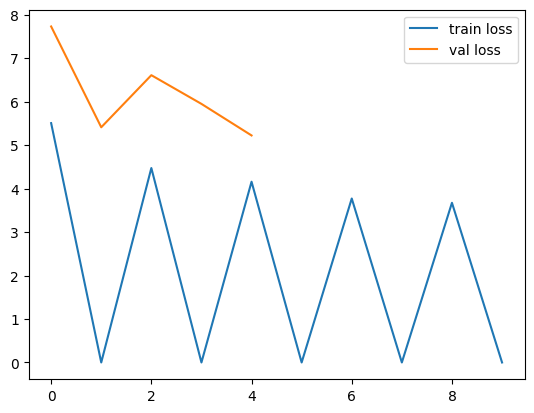

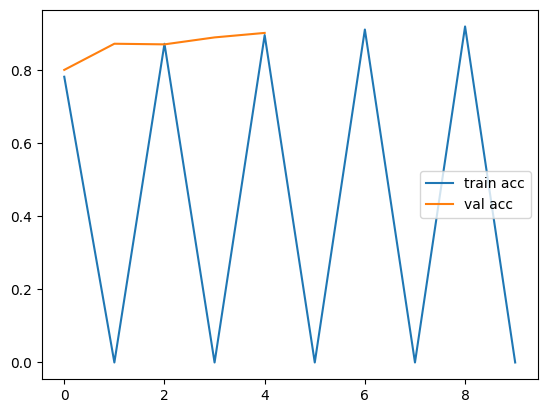

<Figure size 640x480 with 0 Axes>

In [49]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [50]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Assuming `model` is your trained model
# and it outputs class probabilities for multi-class classification

def Plant_Disease_Prediction(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Assuming the model was trained on 224x224 images
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Normalize the image (if required)
    img_array = img_array / 255.0  # Normalize if the model expects input between 0 and 1

    # Make predictions
    predictions = model.predict(img_array)

    # Get predicted class (index of the highest probability)
    predicted_class = np.argmax(predictions, axis=-1)[0]

    # Map the predicted class index to plant disease type
    class_labels=[
    'Apple___Apple_scab',
    'Apple___Black_rot',
    'Apple___Cedar_apple_rust',
    'Apple___healthy',
    'Blueberry___healthy',
    'Cherry_(including_sour)___Powdery_mildew',
    'Cherry_(including_sour)___healthy',
    'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
    'Corn_(maize)___Common_rust_',
    'Corn_(maize)___Northern_Leaf_Blight',
    'Corn_(maize)___healthy',
    'Grape___Black_rot',
    'Grape___Esca_(Black_Measles)',
    'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
    'Grape___healthy',
    'Orange___Haunglongbing_(Citrus_greening)',
    'Peach___Bacterial_spot',
    'Peach___healthy',
    'Pepper,_bell___Bacterial_spot',
    'Pepper,_bell___healthy',
    'Potato___Early_blight',
    'Potato___Late_blight',
    'Potato___healthy',
    'Raspberry___healthy',
    'Soybean___healthy',
    'Squash___Powdery_mildew',
    'Strawberry___Leaf_scorch',
    'Strawberry___healthy',
    'Tomato___Bacterial_spot',
    'Tomato___Early_blight',
    'Tomato___Late_blight',
    'Tomato___Leaf_Mold',
    'Tomato___Septoria_leaf_spot',
    'Tomato___Spider_mites Two-spotted_spider_mite',
    'Tomato___Target_Spot',
    'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
    'Tomato___Tomato_mosaic_virus',
    'Tomato___healthy'
]

    # Get the plant disease type based on predicted class
    plant_disease_type = class_labels[predicted_class]

    print(f"Predicted Plant Disease Type: {plant_disease_type}")

    # Display the image with the predicted class label
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title(f"Plant Disease Type: {plant_disease_type}")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Plant Disease Type: Corn_(maize)___Common_rust_


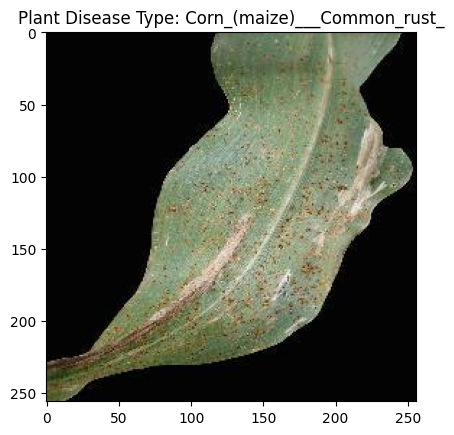

In [62]:
Plant_Disease_Prediction('/content/new-plant-diseases-dataset/test/test/CornCommonRust1.JPG')

In [64]:
import tensorflow as tf

# Save the trained model first. This will create the 'model.h5' file in the current directory.
model.save('my_model.keras')


# Now, you can load the model.
loaded_model = tf.keras.models.load_model('my_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [66]:
from google.colab import files

# Download .keras model
files.download('my_model.keras')

# Download .h5 model (if saved as .h5)
files.download('model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>